<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Explore-the-distribution-of-y1" data-toc-modified-id="1.-Explore-the-distribution-of-y1-1">1. Explore the distribution of y1</a></span></li><li><span><a href="#2.-Explore-the-distribution-of-y2" data-toc-modified-id="2.-Explore-the-distribution-of-y2-2">2. Explore the distribution of y2</a></span></li><li><span><a href="#3.-Explore-the-relationship-between-y1-and-x1." data-toc-modified-id="3.-Explore-the-relationship-between-y1-and-x1.-3">3. Explore the relationship between y1 and x1.</a></span></li></ul></div>

In [1]:
import pyspark
import pandas as pd
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark.sql.functions import col, round as spark_round

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nprocs = 2

spark = (pyspark.sql.SparkSession.builder
 .master('local')
 .config('spark.jars.packages', 'mysql:mysql-connector-java:8.0.16')
 .config('spark.driver.memory', '4G')
 .config('spark.driver.cores', nprocs)
 .config('spark.sql.shuffle.partitions', nprocs)
 .appName('explore')
 .enableHiveSupport()
 .getOrCreate())

In [3]:
spark_df = spark.read.csv('sa311/case.csv', header=True)
spark_df.limit(10).toPandas()

,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,dept_division,service_request_type,SLA_days,case_status,source_id,request_address,council_district
0,1014127332,1/1/18 0:42,1/1/18 12:29,9/26/20 0:42,NO,-998.5087616000001,YES,Field Operations,Stray Animal,999.0,Closed,svcCRMLS,"2315 EL PASO ST, San Antonio, 78207",5
1,1014127333,1/1/18 0:46,1/3/18 8:11,1/5/18 8:30,NO,-2.0126041669999997,YES,Storm Water,Removal Of Obstruction,4.322222222,Closed,svcCRMSS,"2215 GOLIAD RD, San Antonio, 78223",3
2,1014127334,1/1/18 0:48,1/2/18 7:57,1/5/18 8:30,NO,-3.022337963,YES,Storm Water,Removal Of Obstruction,4.320729167,Closed,svcCRMSS,"102 PALFREY ST W, San Antonio, 78223",3
3,1014127335,1/1/18 1:29,1/2/18 8:13,1/17/18 8:30,NO,-15.01148148,YES,Code Enforcement,Front Or Side Yard Parking,16.29188657,Closed,svcCRMSS,"114 LA GARDE ST, San Antonio, 78223",3
4,1014127336,1/1/18 1:34,1/1/18 13:29,1/1/18 4:34,YES,0.37216435200000003,YES,Field Operations,Animal Cruelty(Critical),0.125,Closed,svcCRMSS,"734 CLEARVIEW DR, San Antonio, 78228",7
5,1014127337,1/1/18 6:28,1/1/18 14:38,1/31/18 8:30,NO,-29.74398148,YES,Signals,Traffic Signal Ops and Maintenance,30.08446759,Closed,svcCRMSS,BANDERA RD and BRESNAHAN,7
6,1014127338,1/1/18 6:57,1/2/18 15:32,1/17/18 8:30,NO,-14.70673611,YES,Code Enforcement,Front Or Side Yard Parking,16.06429398,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
7,1014127339,1/1/18 6:58,1/2/18 15:32,1/17/18 8:30,NO,-14.70662037,YES,Code Enforcement,Front Or Side Yard Parking,16.063796300000003,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
8,1014127340,1/1/18 6:58,1/2/18 15:32,1/17/18 8:30,NO,-14.70662037,YES,Code Enforcement,Right Of Way/Sidewalk Obstruction,16.06333333,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4
9,1014127341,1/1/18 6:59,1/2/18 15:32,1/17/18 8:30,NO,-14.70649306,YES,Code Enforcement,Front Or Side Yard Parking,16.0628588,Closed,svcCRMSS,"10133 FIGARO CANYON, San Antonio, 78251",4


In [4]:
x1 = "case_late"
x2 = "case_closed"
x3 = "council_district"
y1 = "num_days_late"
y2 = "SLA_days"

## 1. Explore the distribution of y1

# What did I do wrong here? The minimum is greater than the mean.

In [5]:
spark_df.printSchema()

root
 |-- case_id: string (nullable = true)
 |-- case_opened_date: string (nullable = true)
 |-- case_closed_date: string (nullable = true)
 |-- SLA_due_date: string (nullable = true)
 |-- case_late: string (nullable = true)
 |-- num_days_late: string (nullable = true)
 |-- case_closed: string (nullable = true)
 |-- dept_division: string (nullable = true)
 |-- service_request_type: string (nullable = true)
 |-- SLA_days: string (nullable = true)
 |-- case_status: string (nullable = true)
 |-- source_id: string (nullable = true)
 |-- request_address: string (nullable = true)
 |-- council_district: string (nullable = true)



In [6]:
spark_df = spark_df.withColumn("num_days_late", spark_df.num_days_late.cast("double"))
spark_df = spark_df.withColumn("SLA_days", spark_df.SLA_days.cast("double"))

In [7]:
(spark_df.select(y1)
        .describe()
        .show())

+-------+-------------------+
|summary|      num_days_late|
+-------+-------------------+
|  count|             841671|
|   mean|-49.074867583697205|
| stddev| 176.53002498187413|
|    min|-1417.0006019999998|
|    max|        519.6980787|
+-------+-------------------+



What do the ends look like?

In [8]:
spark_df.agg(F.skewness(y1), F.kurtosis(y1)).show()

+-----------------------+-----------------------+
|skewness(num_days_late)|kurtosis(num_days_late)|
+-----------------------+-----------------------+
|     -4.940376908429641|      23.84786599971034|
+-----------------------+-----------------------+



Take a sample for plotting

In [9]:
pandas_df = (spark_df.dropna()
                     .sample(False, 0.01)
                     .toPandas())

In [10]:
num_days_late = pandas_df[y1]

Visualize the distribution

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


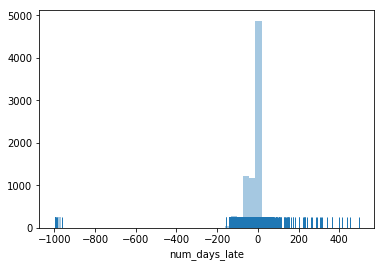

In [11]:
sns.distplot(num_days_late, kde=False, rug=True)
plt.show()

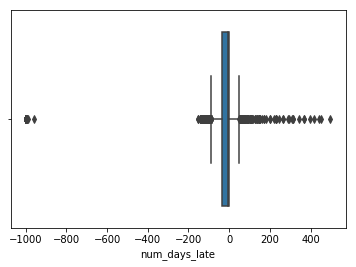

In [12]:
sns.boxplot(num_days_late)
plt.show()

Most cases are resolved on time or may be completed a few days late.

What do negative num_days_late mean?

In [13]:
df_neg_num_days_late = pandas_df[num_days_late < 0]
df_neg_num_days_late.head()

,case_id,case_opened_date,case_closed_date,SLA_due_date,case_late,num_days_late,case_closed,dept_division,service_request_type,SLA_days,case_status,source_id,request_address,council_district
1,1014127650,1/1/18 16:59,1/1/18 19:44,1/11/18 16:59,NO,-9.885093,YES,Field Operations,Public Nuisance(Own Animal),10.000000,Closed,124405,"1415 24TH ST NW, San Antonio, 78207",5
2,1014127719,1/1/18 18:08,2/22/18 14:28,3/7/18 8:30,NO,-12.750937,YES,Code Enforcement,Sewer Line Broken,64.598368,Closed,svcCRMSS,"5326 GHOST HAWK, San Antonio, 78242",4
3,1014128125,1/2/18 8:43,1/5/18 7:54,3/7/18 8:43,NO,-61.034132,YES,Code Enforcement,Permits Building,64.000000,Closed,svcCRMSS,"904 HOUSTON ST W, San Antonio, 78207",5
6,1014128598,1/2/18 10:15,1/2/18 10:18,1/17/18 10:15,NO,-14.998426,YES,Code Enforcement,Bandit Signs,15.000000,Closed,CRM_Listener,OREY AVE and SURREY AVE,5
7,1014128710,1/2/18 10:33,1/2/18 11:19,1/4/18 10:33,NO,-1.968275,YES,Miscellaneous,Dead Animal - Dog,2.000000,Closed,135723,"361 SAN IGNACIO N, San Antonio, 78237",5


It means the case was closed before the SLA_due_date by that number of days

Select only the cases that were/are late

In [14]:
pos_num_days_late = num_days_late[num_days_late >= 0]

In [15]:
pos_num_days_late.describe()

count    897.000000
mean      24.055414
std       55.870829
min        0.000567
25%        0.730856
50%        4.000764
75%       21.916667
max      496.832384
Name: num_days_late, dtype: float64

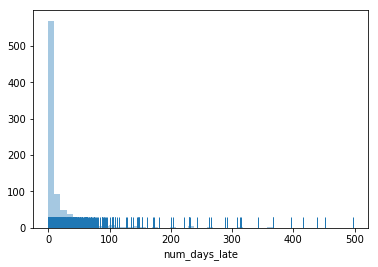

In [16]:
sns.distplot(pos_num_days_late, kde=False, rug=True)
plt.show()

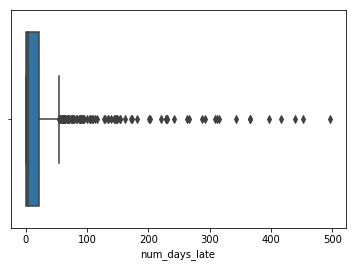

In [17]:
sns.boxplot(pos_num_days_late)
plt.show()

Most are resolved in under 25 days

In [18]:
late = (spark_df.select(spark_df.num_days_late, spark_df.service_request_type)
         .groupBy("service_request_type")
         .count()
         .orderBy("count", ascending=False)
         #.show(truncate=False)
).toPandas()

In [19]:
late[:10]

,service_request_type,count
0,No Pickup,86855
1,Overgrown Yard/Trash,65895
2,Bandit Signs,32910
3,Damaged Cart,30338
4,Front Or Side Yard Parking,28794
5,Stray Animal,26760
6,Aggressive Animal(Non-Critical),24882
7,Cart Exchange Request,22024
8,Junk Vehicle On Private Property,21473
9,Pot Hole Repair,20616


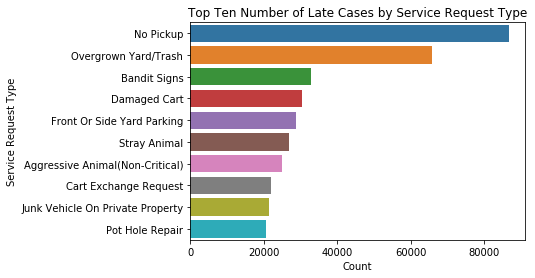

In [20]:
sns.barplot(y="service_request_type", x="count", data=late[:10], orient="h")
plt.ylabel("Service Request Type")
plt.xlabel("Count")
plt.title("Top Ten Number of Late Cases by Service Request Type")
plt.show()

Most late cases are resolved in fewer than 50 days. But there are a bunch of outliers. What are these?

In [21]:
very_late = (spark_df.where(spark_df.num_days_late > 75)
         .groupBy("service_request_type")
         .count()
         .orderBy("count", ascending=False)
         #.show(truncate=False)
).toPandas()

In [22]:
very_late.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
service_request_type    152 non-null object
count                   152 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


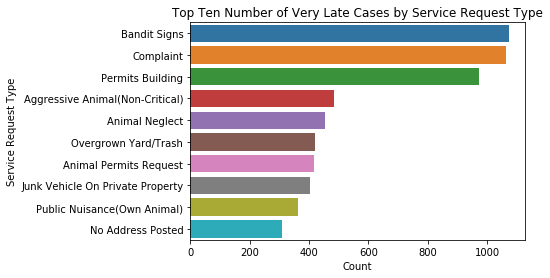

In [23]:
sns.barplot(y="service_request_type", x="count", data=very_late[:10], orient="h")
plt.ylabel("Service Request Type")
plt.xlabel("Count")
plt.title("Top Ten Number of Very Late Cases by Service Request Type")
plt.show()

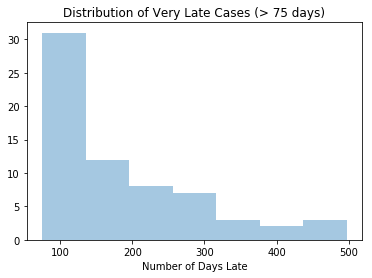

In [24]:
sns.distplot(num_days_late[num_days_late > 75], kde=False)
plt.title("Distribution of Very Late Cases (> 75 days)")
plt.xlabel("Number of Days Late")
plt.show()

The types of very late cases (> 75 days) are different than the types for merely late cases. Permits and complaints stand out as not in the top ten of merely late cases. Bandit signs is near or at the top for both degrees of lateness. Is there something about the request types in the very late cases that cause them to be so late? 

What does the distribution look like by district and request type

In [25]:
(spark_df.where(spark_df.num_days_late > 75)
         .select("council_district", "service_request_type", "num_days_late")
         .groupBy(["council_district", "service_request_type"])
         .count()
         .orderBy("count", ascending=False)
         .show(truncate=False))

+----------------+--------------------+-----+
|council_district|service_request_type|count|
+----------------+--------------------+-----+
|1               |Permits Building    |237  |
|5               |Bandit Signs        |192  |
|6               |Permits Building    |176  |
|3               |Bandit Signs        |171  |
|4               |Zoning: Junk Yards  |164  |
|2               |Permits Building    |154  |
|1               |Complaint           |138  |
|3               |Permits Building    |136  |
|2               |Complaint           |131  |
|3               |Complaint           |122  |
|5               |Complaint           |122  |
|10              |Bandit Signs        |120  |
|5               |Permits Building    |119  |
|4               |Complaint           |112  |
|5               |Animal Neglect      |109  |
|1               |Bandit Signs        |107  |
|10              |Complaint           |107  |
|7               |Complaint           |105  |
|9               |Bandit Signs    

## 2. Explore the distribution of y2

In [26]:
spark_df = spark_df.withColumn("SLA_days", spark_df.SLA_days.cast("double"))

In [27]:
(spark_df.select(y2)
        .describe()
        .show())

+-------+------------------+
|summary|          SLA_days|
+-------+------------------+
|  count|            841671|
|   mean| 59.25478976660636|
| stddev|174.52559467491596|
|    min|             0.125|
|    max|            1420.0|
+-------+------------------+



What cases are at the min?

In [28]:
spark_df.where(spark_df.SLA_days == 0.125).show(vertical=True, truncate=False)

-RECORD 0-------------------------------------------------------
 case_id              | 1014127336                              
 case_opened_date     | 1/1/18 1:34                             
 case_closed_date     | 1/1/18 13:29                            
 SLA_due_date         | 1/1/18 4:34                             
 case_late            | YES                                     
 num_days_late        | 0.37216435200000003                     
 case_closed          | YES                                     
 dept_division        | Field Operations                        
 service_request_type | Animal Cruelty(Critical)                
 SLA_days             | 0.125                                   
 case_status          | Closed                                  
 source_id            | svcCRMSS                                
 request_address      | 734  CLEARVIEW DR, San Antonio, 78228   
 council_district     | 7                                       
-RECORD 1----------------

They are critical animal cruelty or injured animal cases

What cases are at the max?

In [29]:
spark_df.where(spark_df.SLA_days == 1420).show(vertical=True, truncate=False)

-RECORD 0------------------------------------------------------
 case_id              | 1013822328                             
 case_opened_date     | 8/25/17 10:47                          
 case_closed_date     | 8/28/17 10:46                          
 SLA_due_date         | 7/15/21 10:47                          
 case_late            | NO                                     
 num_days_late        | -1417.0006019999998                    
 case_closed          | YES                                    
 dept_division        | Signals                                
 service_request_type | Signal Timing Modification By Engineer 
 SLA_days             | 1420.0                                 
 case_status          | Closed                                 
 source_id            | CRM_Listener                           
 request_address      | DATAPOINT and WURZBACH RD              
 council_district     | 8                                      



Should be skewed right

In [30]:
spark_df.agg(F.skewness(y2), F.kurtosis(y2)).show()

+------------------+------------------+
|skewness(SLA_days)|kurtosis(SLA_days)|
+------------------+------------------+
| 4.983687199032779|23.983570974325893|
+------------------+------------------+



In [31]:
sla_days = pandas_df.SLA_days

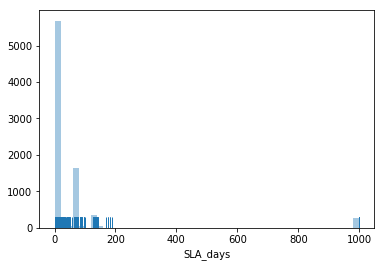

In [32]:
sns.distplot(sla_days, kde=False, rug=True)
plt.show()

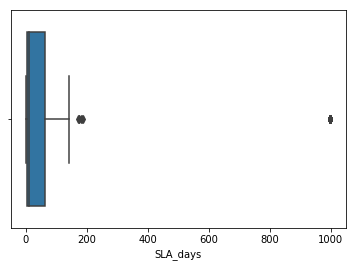

In [33]:
sns.boxplot(sla_days)
plt.show()

Most cases have a due date of less than 100 days. The vast majority are only a few days

What kind of service requests have SLA days of fewer than two weeks?

In [34]:
(spark_df.where(spark_df.SLA_days < 14)
         .groupBy("service_request_type")
         .count()
         .orderBy("count", ascending=False)
         .show(truncate=False))

+----------------------------------------------+-----+
|service_request_type                          |count|
+----------------------------------------------+-----+
|No Pickup                                     |86855|
|Damaged Cart                                  |30064|
|Aggressive Animal(Non-Critical)               |24882|
|Cart Exchange Request                         |21955|
|Pot Hole Repair                               |20616|
|Lost/Stolen Cart                              |18552|
|Dead Animal - Dog                             |16714|
|Cart Delivery                                 |15321|
|Dead Animal - Cat                             |14983|
|Animal Neglect                                |13441|
|Dead Animal - Misc                            |13234|
|Trapped/Confined Animal                       |11354|
|Public Nuisance(Own Animal)                   |10715|
|Cart PickUp                                   |10017|
|Injured Animal(Critical)                      |9633 |
|Traffic S

These look to be requests of a time-sensitive nature

What about for those with SLA_days of greater than two months

In [35]:
(spark_df.where(spark_df.SLA_days > 60)
         .groupBy("service_request_type")
         .count()
         .orderBy("count", ascending=False)
         .show(truncate=False))

+--------------------------------------+-----+
|service_request_type                  |count|
+--------------------------------------+-----+
|Overgrown Yard/Trash                  |65895|
|Stray Animal                          |26760|
|Junk Vehicle On Private Property      |21473|
|Alley-Way Maintenance                 |20214|
|Vacant Lot/Overgrown/Trash            |9329 |
|Minimum Housing-Owner Occupied        |8543 |
|Graffiti: Private Property (Corridors)|8525 |
|Dang. Premises/CL/SEC                 |8004 |
|Minimum Housing-Tenant Occupied       |7984 |
|"Vacant Lot-Private (12"")"           |7875 |
|Brush Violations                      |7475 |
|Vacant House Overgrown Yard           |6109 |
|Base/Pavement Repair                  |5385 |
|Permits Building                      |4605 |
|Signal Timing Modification            |4414 |
|Low Hanging Limbs on Streets/Sidewalk |4052 |
|CPS Energy Wood Poles                 |3501 |
|Zoning Business in Resident Area      |2716 |
|Zoning: Dist

Most of these are not time-sensitive.

## 3. Explore the relationship between y1 and x1.

In [36]:
(spark_df.groupBy(x1)
         .agg(F.count(y1), F.mean(y1), F.stddev(y1), F.min(y1), F.max(y1))
         .orderBy(x1)
         .show(vertical=True))

-RECORD 0------------------------------------------
 case_late                  | NO                   
 count(num_days_late)       | 747168               
 avg(num_days_late)         | -58.49713051774848   
 stddev_samp(num_days_late) | 184.39797239177227   
 min(num_days_late)         | -1417.0006019999998  
 max(num_days_late)         | -1.15741000000000... 
-RECORD 1------------------------------------------
 case_late                  | YES                  
 count(num_days_late)       | 94503                
 avg(num_days_late)         | 25.42026327891507    
 stddev_samp(num_days_late) | 49.59320933377148    
 min(num_days_late)         | 1.157410000000000... 
 max(num_days_late)         | 519.6980787          



About 10 percent of cases are late and are completed, on average, 25 days late.

In [37]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8243 entries, 0 to 8242
Data columns (total 14 columns):
case_id                 8243 non-null object
case_opened_date        8243 non-null object
case_closed_date        8243 non-null object
SLA_due_date            8243 non-null object
case_late               8243 non-null object
num_days_late           8243 non-null float64
case_closed             8243 non-null object
dept_division           8243 non-null object
service_request_type    8243 non-null object
SLA_days                8243 non-null float64
case_status             8243 non-null object
source_id               8243 non-null object
request_address         8243 non-null object
council_district        8243 non-null object
dtypes: float64(2), object(12)
memory usage: 901.7+ KB


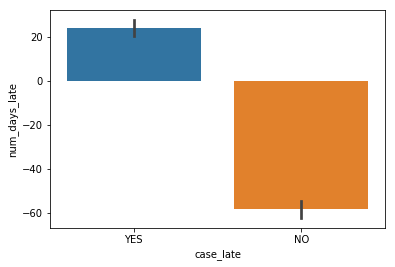

In [38]:
sns.barplot(x1, y1, data=pandas_df)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2612: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


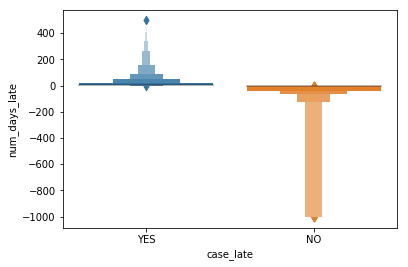

In [39]:
sns.lvplot(x1, y1, data=pandas_df)
plt.show()

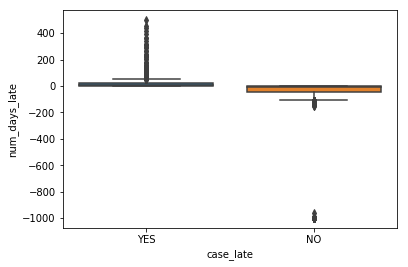

In [40]:
sns.boxplot(x1, y1, data=pandas_df)
plt.show()

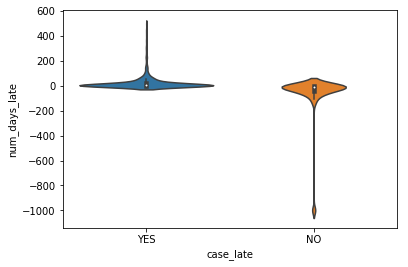

In [41]:
sns.violinplot(x1, y1, data=pandas_df)
plt.show()

Overwhelming majority of cases are resolved days or weeks before the due date or are only a few days late.